In [1]:
# ignore this
%load_ext music21.ipython21

# User’s Guide, Chapter 22: Graphing and plotting

Music notation isn't the only way to understand music visually.  Sometimes a plot of a musical score can reveal relationships across a piece that are hard to understand otherwise. `music21` includes a lot of ways to visualize notes, scores, and measures, and in this chapter we will see some of the most common ones.

## Piano Rolls!

The easiest way to see how pitches evolve over the course of a piece is to create a virtual representation
of a piano roll.  Unlike a traditional piano roll, time is usually represented on the horizontal axis and
pitch height along the vertical.  The easiest way to see how this works is simply to create one of these
graphs, so we can get started.  Let's load up some Verdi:

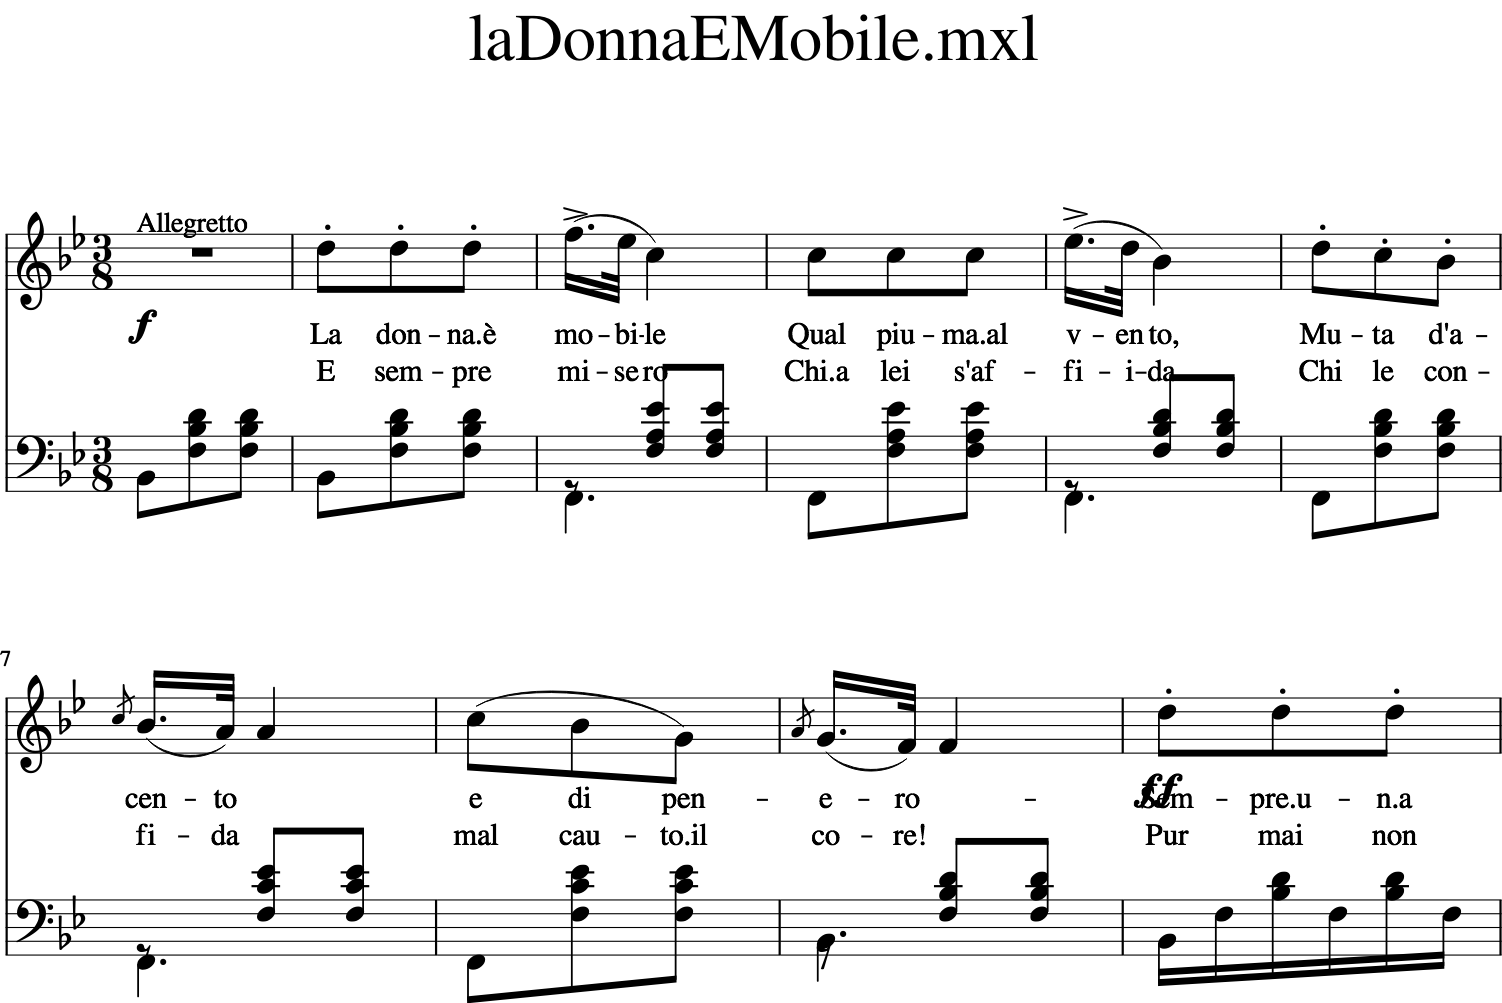

In [2]:
verdi = corpus.parse('verdi/laDonnaEMobile')
verdi.measures(1, 10).show()

First, let's visualize the vocal part alone:

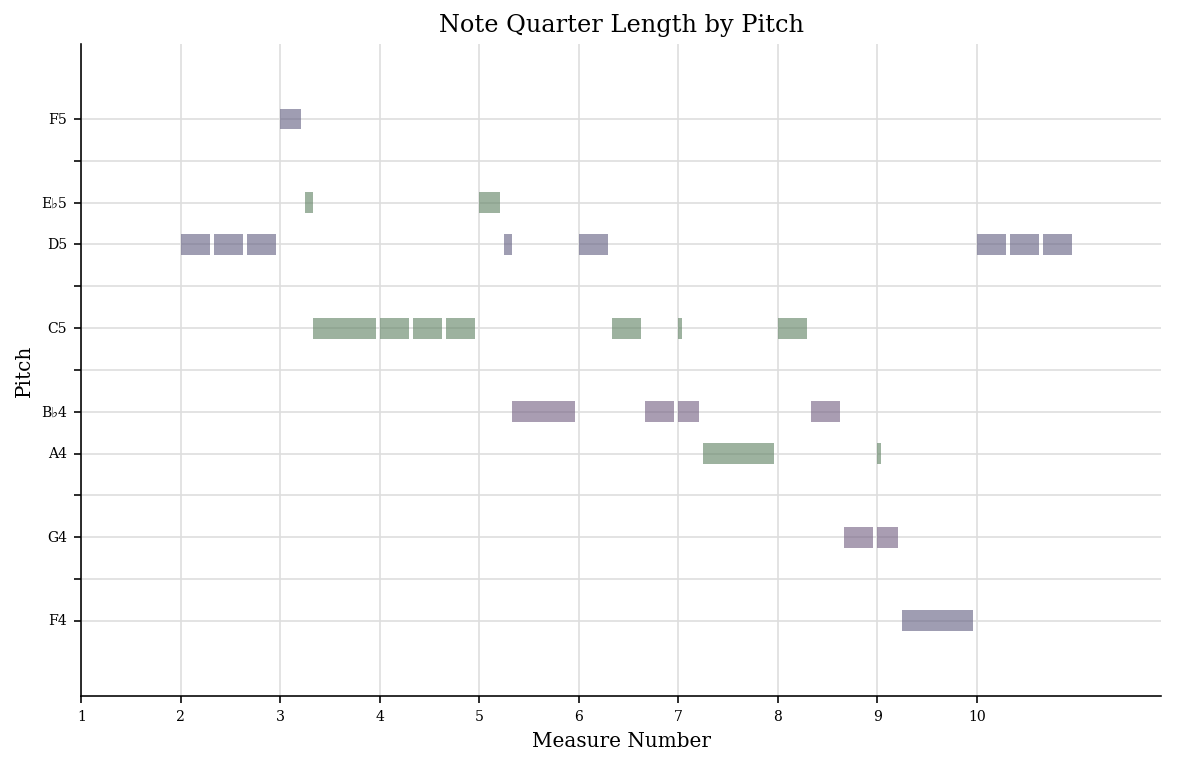

In [3]:
voice = verdi.parts[0]
voice.measures(1, 10).plot()

The default here is to plot pitch against time, calculated in measures.  `music21` takes care of some of the hard things that can make visualizing music in most data visualization software (such as Microsoft Excel) difficult.  For instance, measure numbers are used directly as they appear in the score; pitches are labeled with names only when they appear (including the choosing most commonly appearing enharmonic spelling, using proper sharp and flat signs instead of "b" and "#").  We can make a fake piece to see how this works:

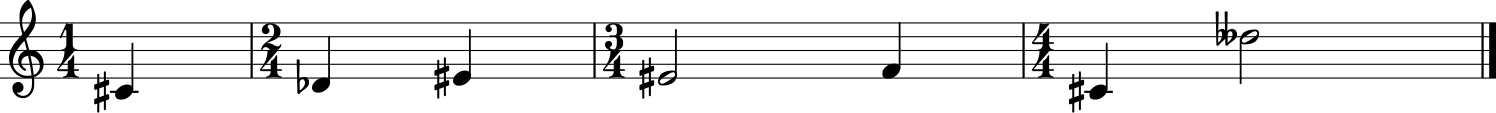

In [4]:
fakePiece = converter.parse("tinyNotation: 1/4 c#4 2/4 d-4 e#4 3/4 e#2 f4 4/4 c#4 d'--2")
fakePiece.show()

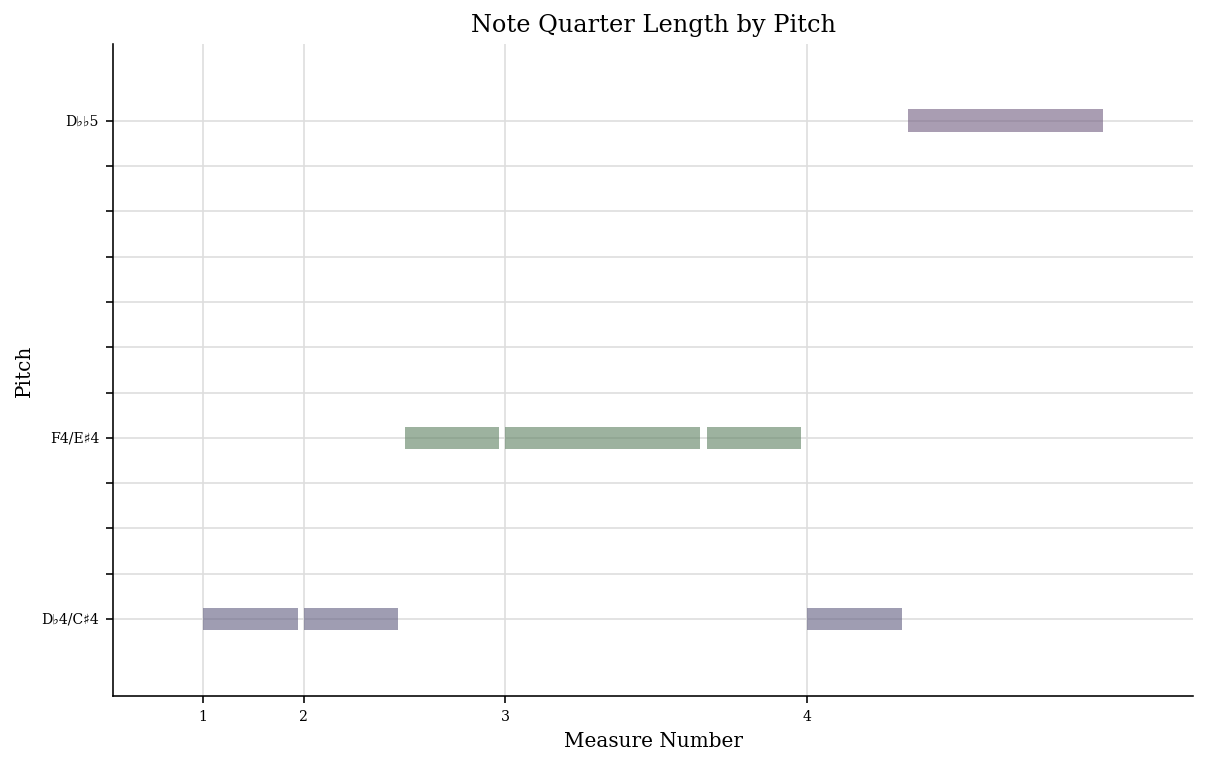

In [5]:
fakePiece.plot()

(This was hard to do! And we're, I hope justifiably, proud of getting things like this right.  Major shoutout to Christopher Ariza who wrote 90% of the graphing code).

We can make other types of graphs just as easily.  For instance, plotting lengths of notes against their position in space.  For this one, a little piece by Schoenberg (Opus 19, no. 2) is great, since the repetition of G4 + B4 as eighth notes becomes clear:

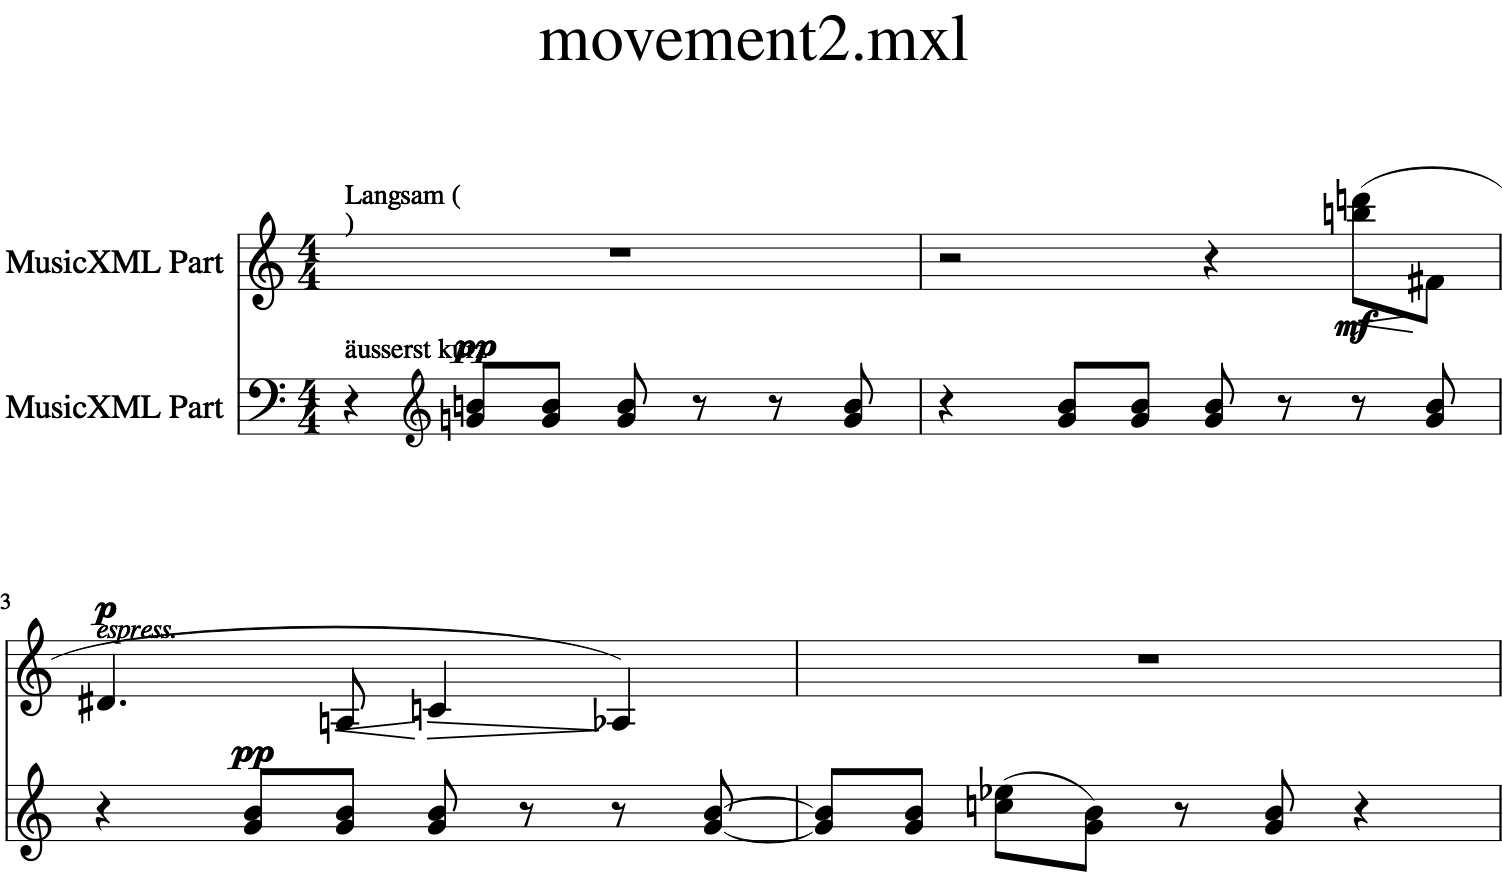

In [6]:
schoenberg = corpus.parse('schoenberg/opus19', 2)
schoenberg.measures(1, 4).show()

Let's do a scatter plot of quarterLength against pitch:

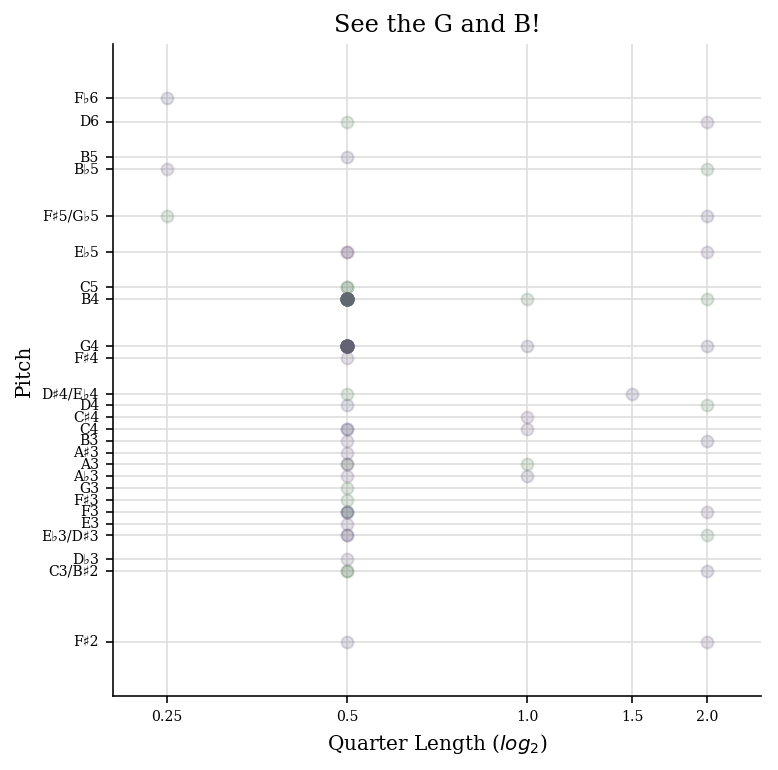

In [7]:
schoenberg.plot('scatter', 'quarterLength', 'pitch', title='See the G and B!')

It's a little small on this website (you can make it as big as you want on your own with the keyword `dpi=400` or so), so maybe just a histogram of pitch would be better:

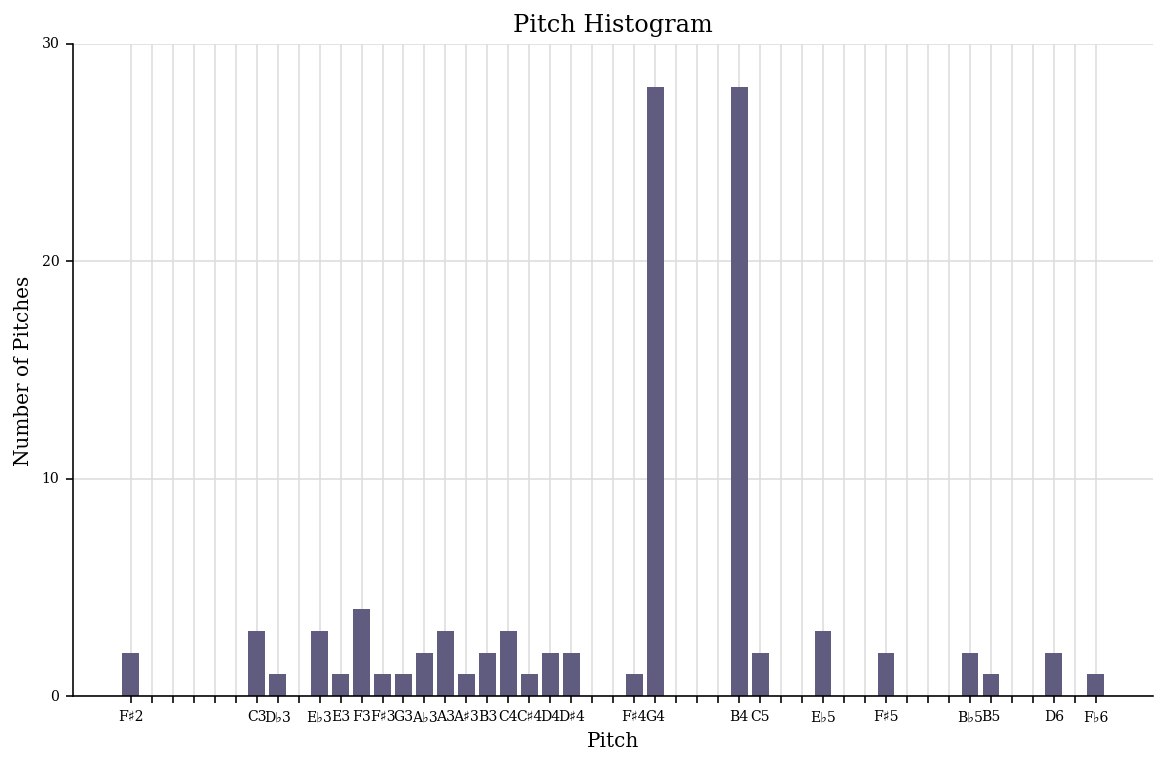

In [8]:
schoenberg.plot('histogram', 'pitch', xHideUnused=False, yAxisLabel='Number of Pitches')

Or even just pitch classes:

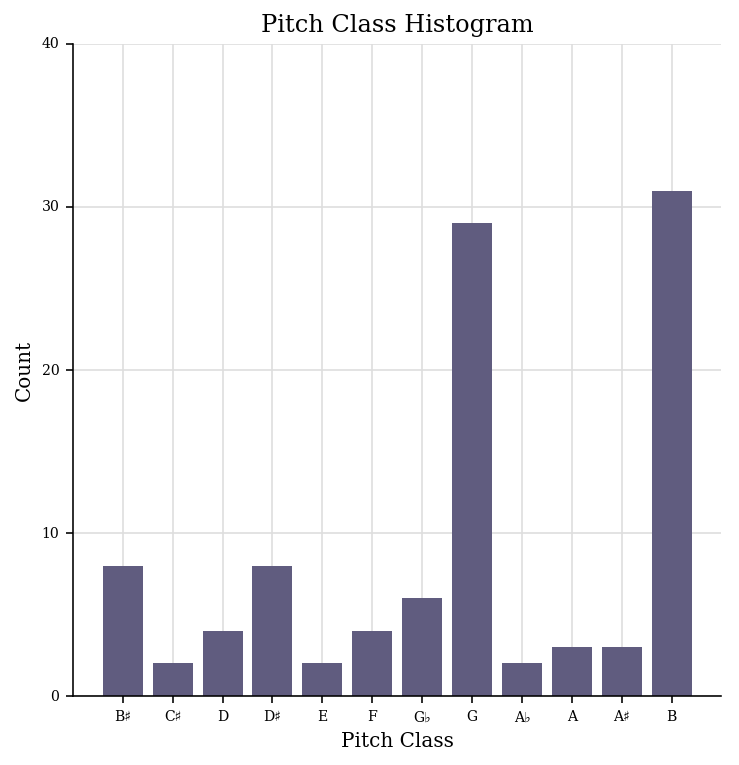

In [9]:
schoenberg.plot('histogram', 'pitchClass')

Okay, so we've gotten a taste for graphs, let's look more closely at how to make them:


## Installing graphing software

All plots require installing the `matplotlib` and `numpy` libraries.   On `python3` install them by typing at the command line:

    pip3 install matplotlib
    
and `numpy` will come along free.  Depending on your Python installation you might need to instead type:

    sudo pip3 install matplotlib
    
In recent versions of OS X/macOS, such as El Capitan and Sierra, there are some major problems in installing `matplotlib` on some Python installations (including `Anaconda` python).  This is why `music21` recommends using the Python 3 installation directly from [the Python.org website](http://www.python.org).  To use matplotlib inside a Jupyter notebook, add

    %matplotlib inline
    
to the first notebook cell.  However this step is not necessary if the music21 extension is installed with:

    %load_ext music21.ipython21

For more information on installing, see :ref:`installAdditional`

## Where are graphs located?

Graphing functions are located in the :ref:`moduleGraph` modules, specifically: :ref:`moduleGraphPrimitives`, :ref:`moduleGraphPlot` and :ref:`moduleGraphAxis`.  With some utility functions located in :ref:`moduleGraphUtilities`.

## What sorts of graphs are there?

We can look in `graph.utilities.FORMATS` for the list of possible graphs:

In [10]:
graph.utilities.FORMATS

['horizontalbar',
 'histogram',
 'scatter',
 'scatterweighted',
 '3dbars',
 'colorgrid',
 'horizontalbarweighted']

We might as well start by trying them!

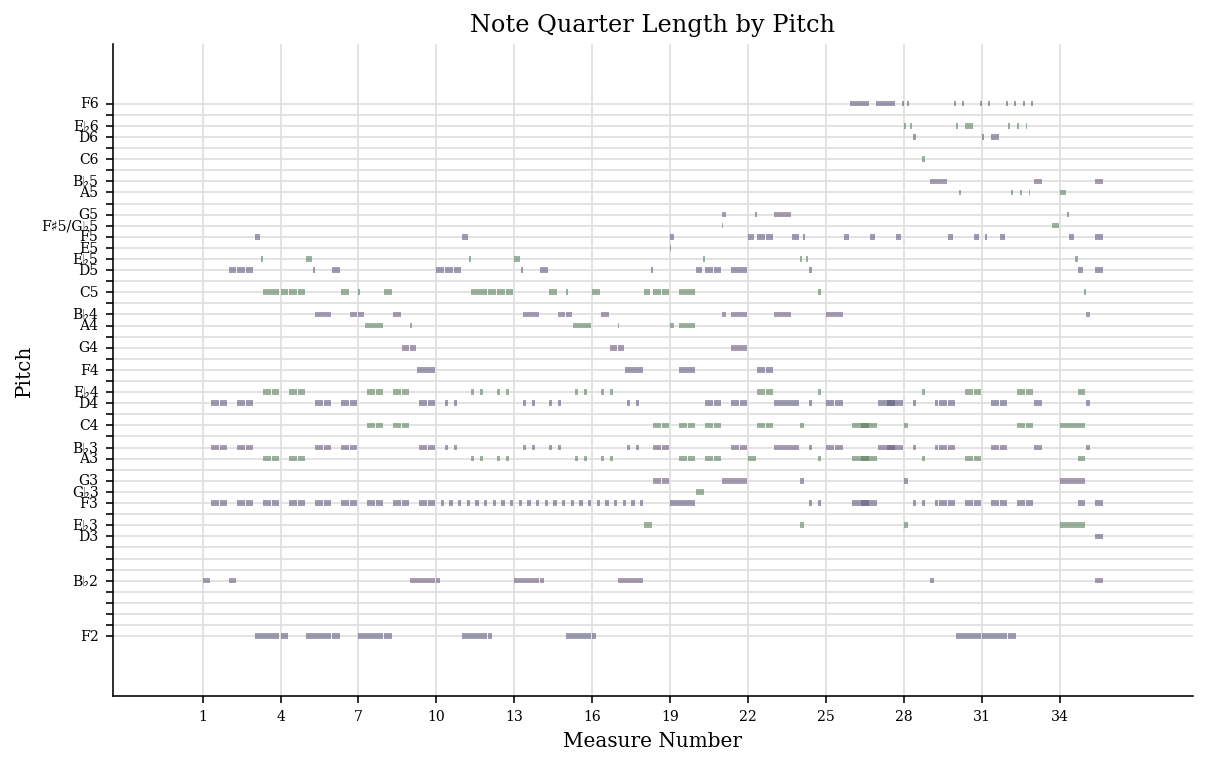

In [11]:
verdi.plot('horizontalbar')

This one we've already seen.  Same with the next one:

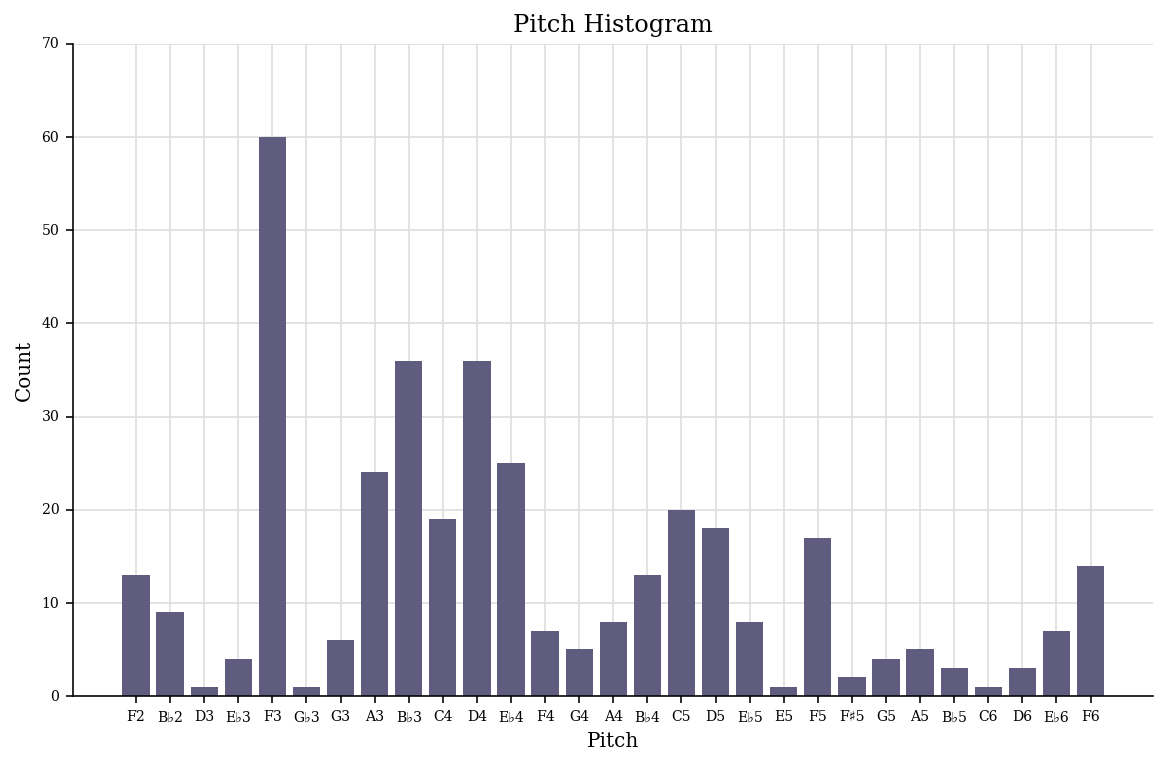

In [12]:
verdi.plot('histogram')

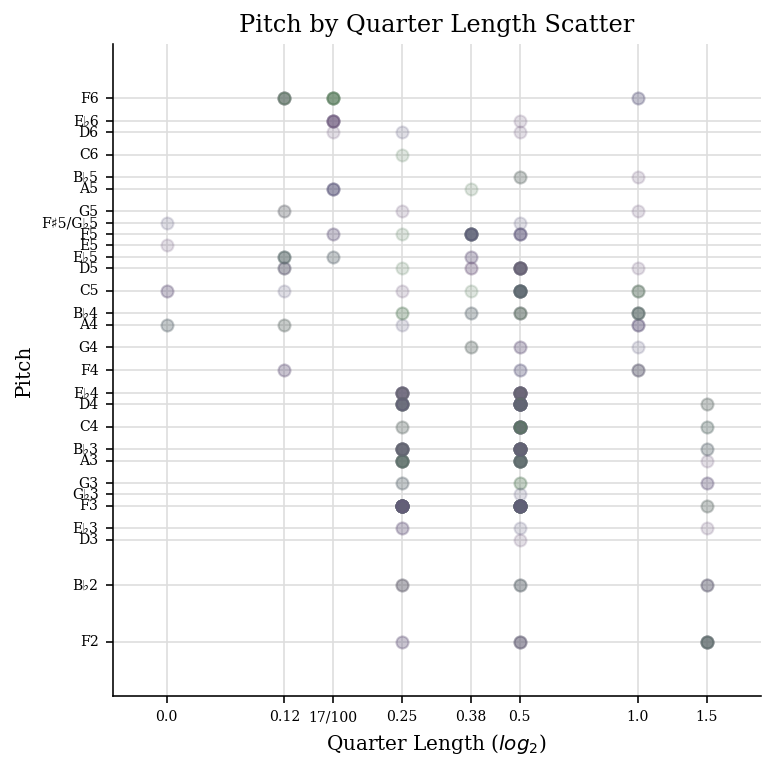

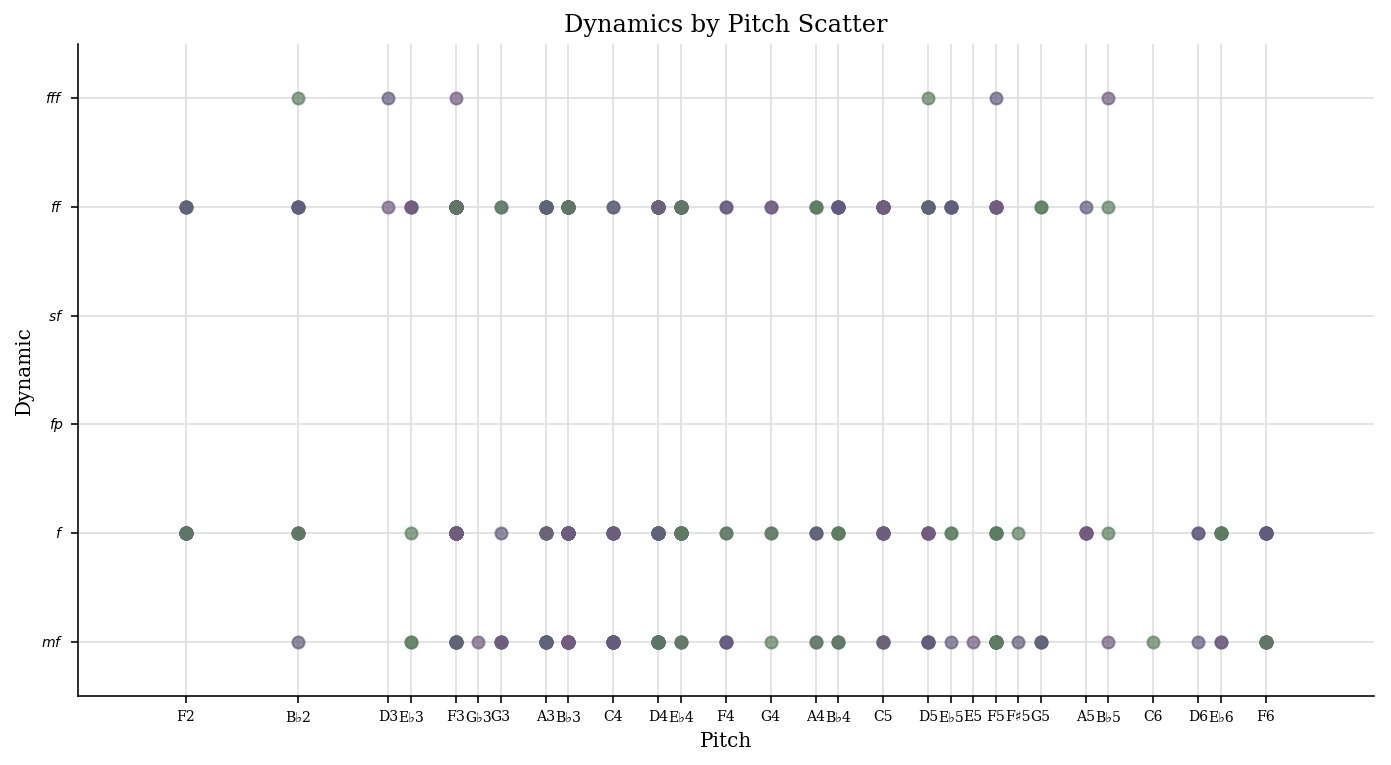

In [13]:
verdi.plot('scatter')

There were two kinds of scatter plots -- one that plotted quarter length against pitch and one that plotted pitch against dynamics.  We'll figure out how to get the one we want later.  Let's keep going:

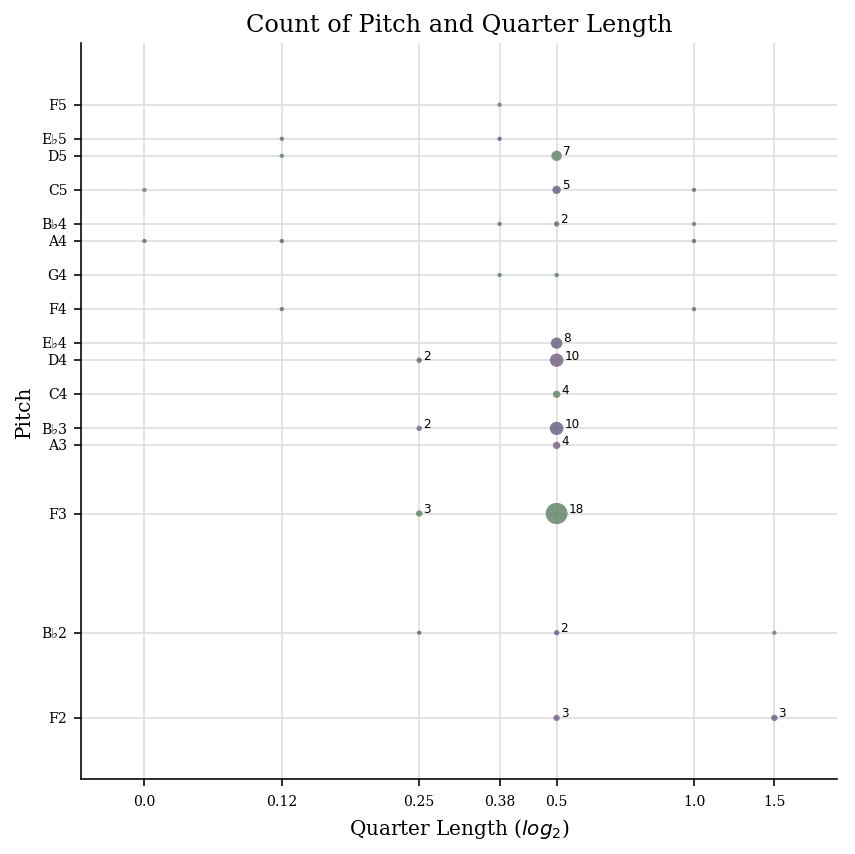

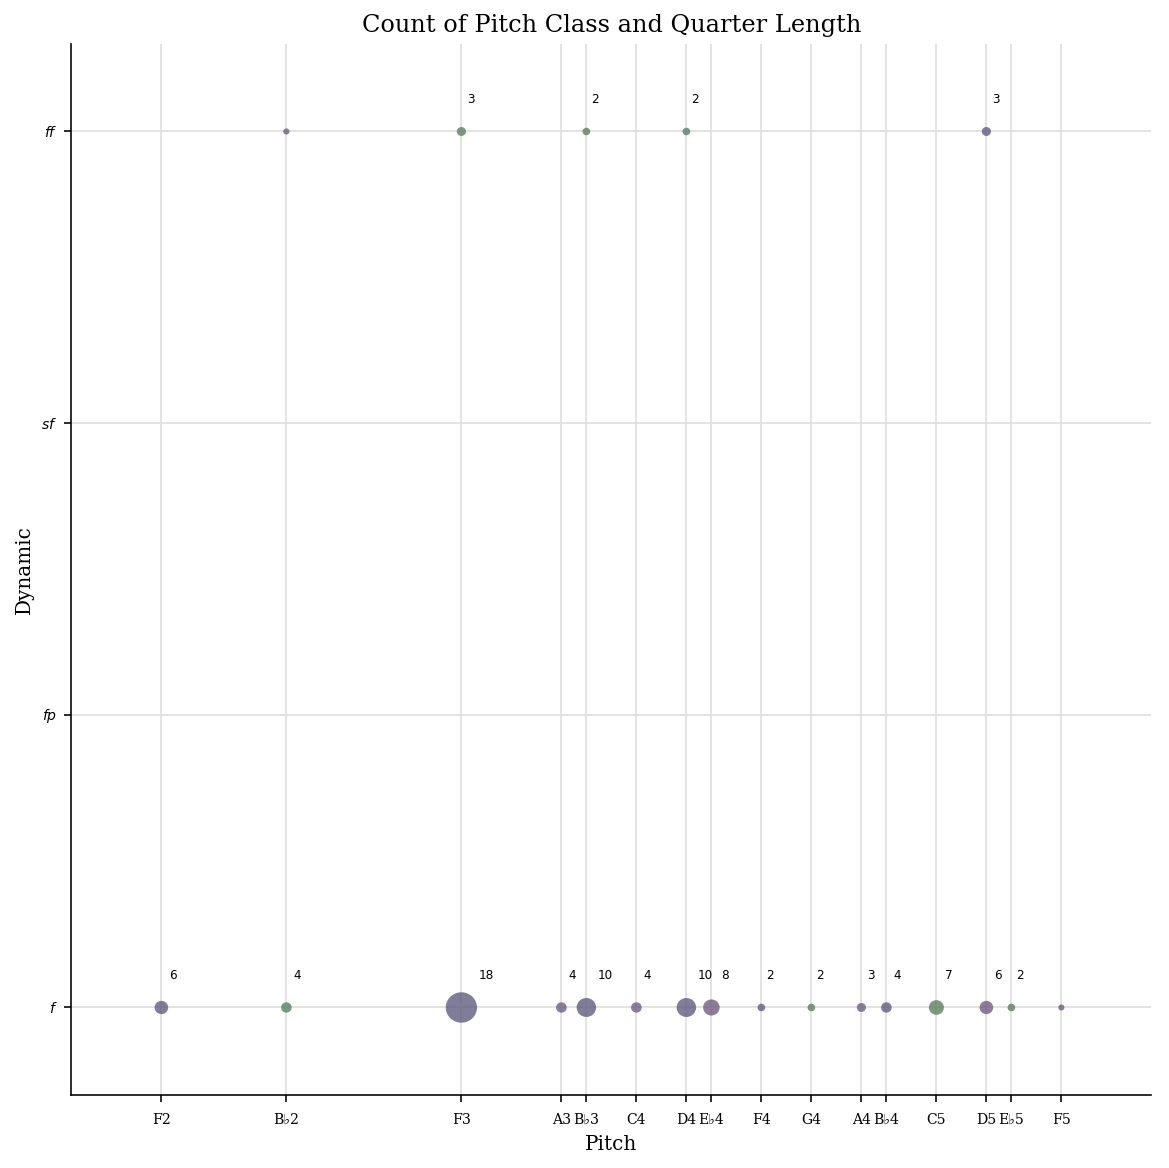

In [15]:
verdi.measures(1, 10).plot('scatterweighted')

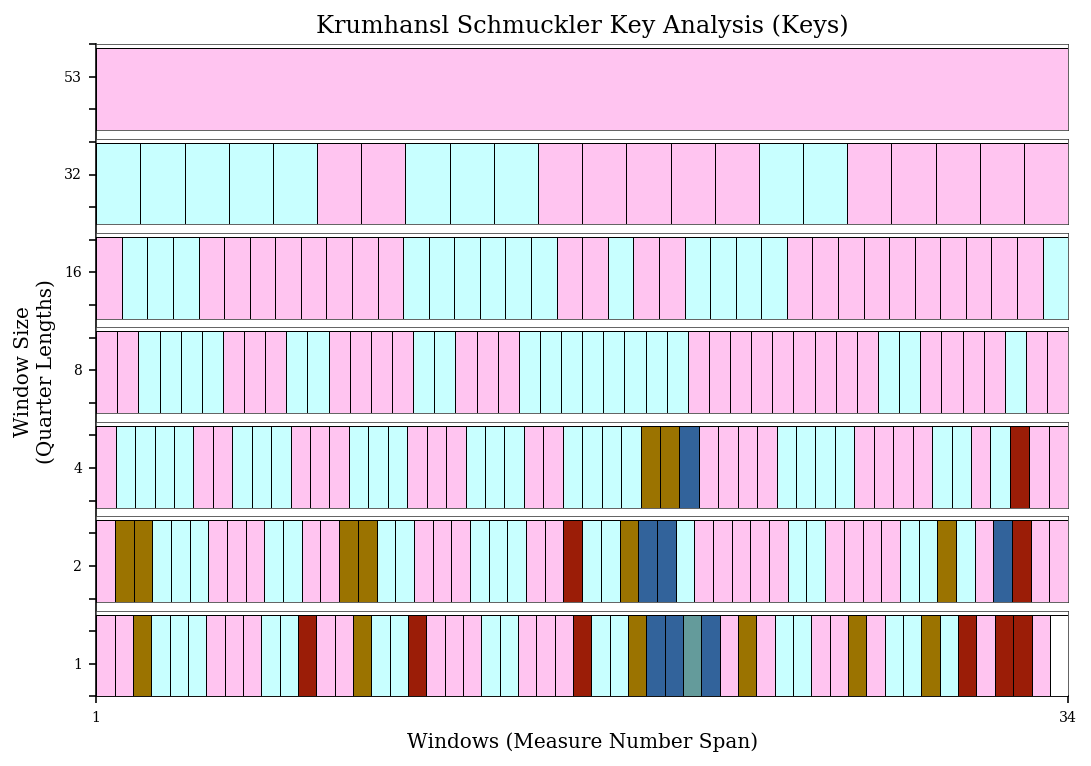

In [16]:
verdi.plot('colorgrid')

That one isn't that useful without its legend -- we'll get back to it.  When you plot it in your system, you'll see the legend appear.

Here we can see each part plotted when it plays and with dynamics:

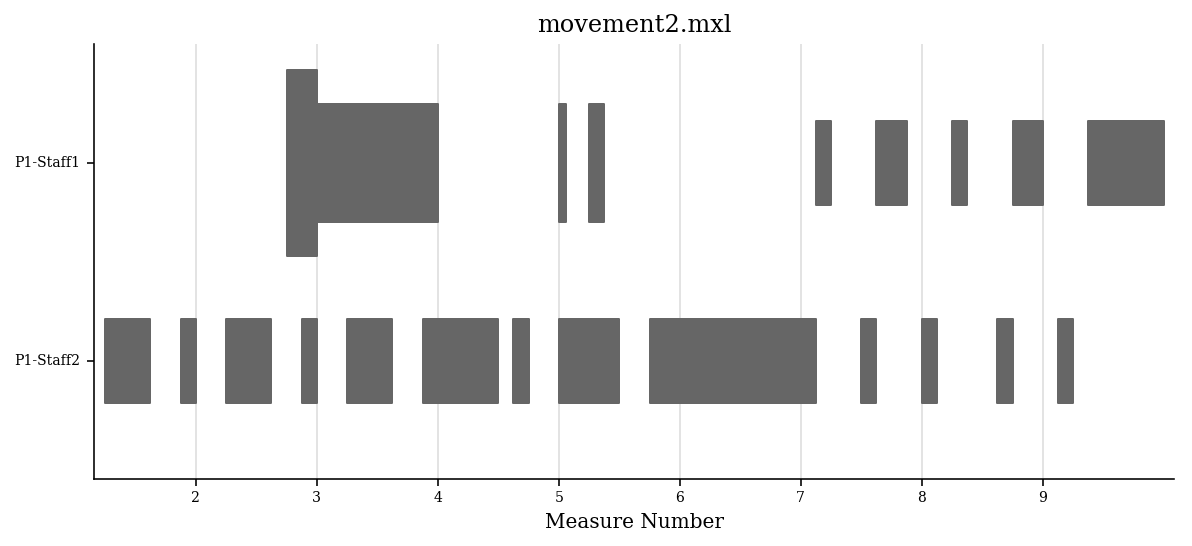

In [18]:
schoenberg.plot('horizontalbarweighted')

and we've saved the silliest for last:

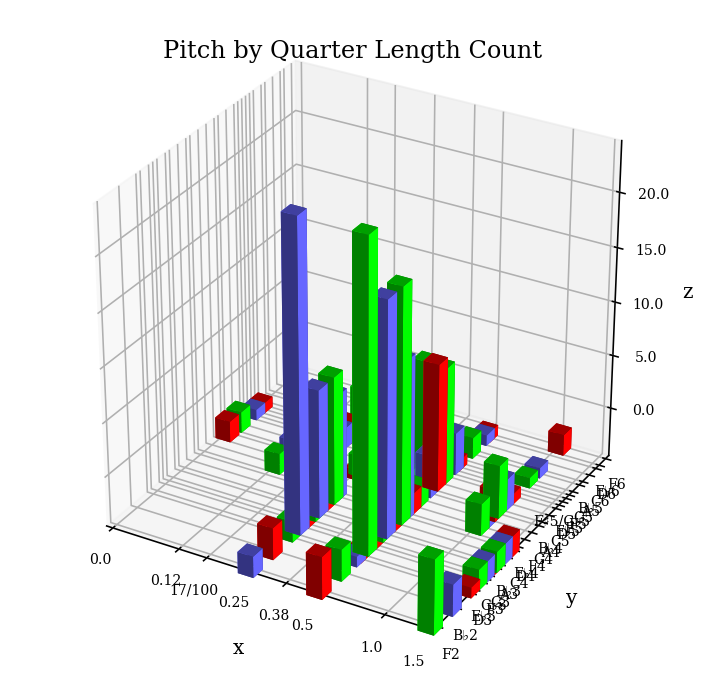

In [19]:
verdi.plot('3dbars')

The 3D aspect looks pretty cool, but I have a hard time learning from it.

Each of these plots also has a bunch of synonyms in case you want to use other terms:

In [20]:
graph.utilities.FORMAT_SYNONYMS

[('horizontalbar', 'bar', 'horizontal', 'pianoroll', 'piano'),
 ('histogram', 'histo', 'count'),
 ('scatter', 'point'),
 ('scatterweighted', 'weightedscatter', 'weighted'),
 ('3dbars', '3d'),
 ('colorgrid', 'grid', 'window', 'windowed'),
 ('horizontalbarweighted', 'barweighted', 'weightedbar')]

Okay, so now you know what types of graphs you can make.  The next arguments determine what sorts of things you can put on the axes:

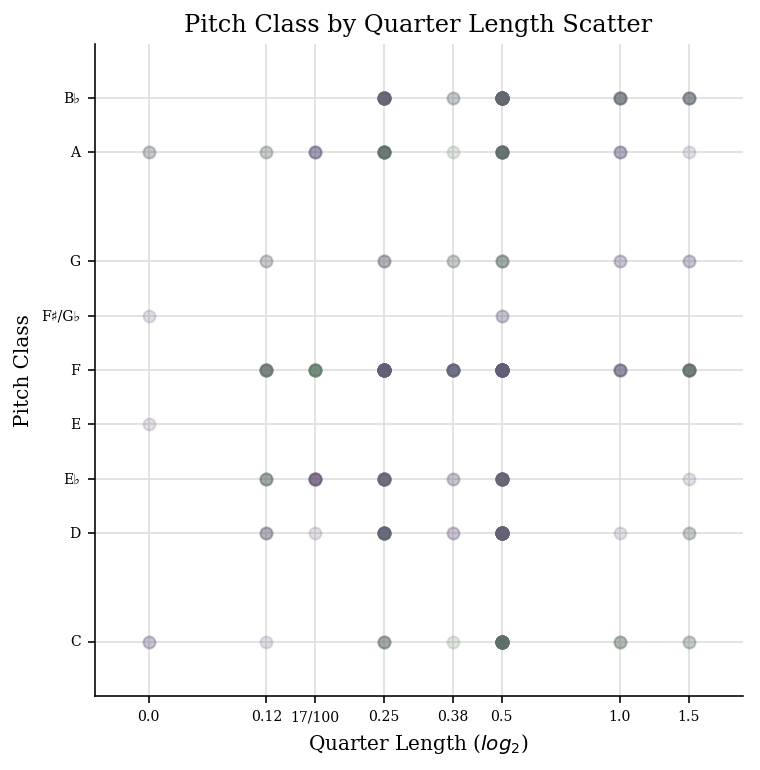

In [21]:
verdi.plot('scatter', 'pitchClass', 'quarterLength')

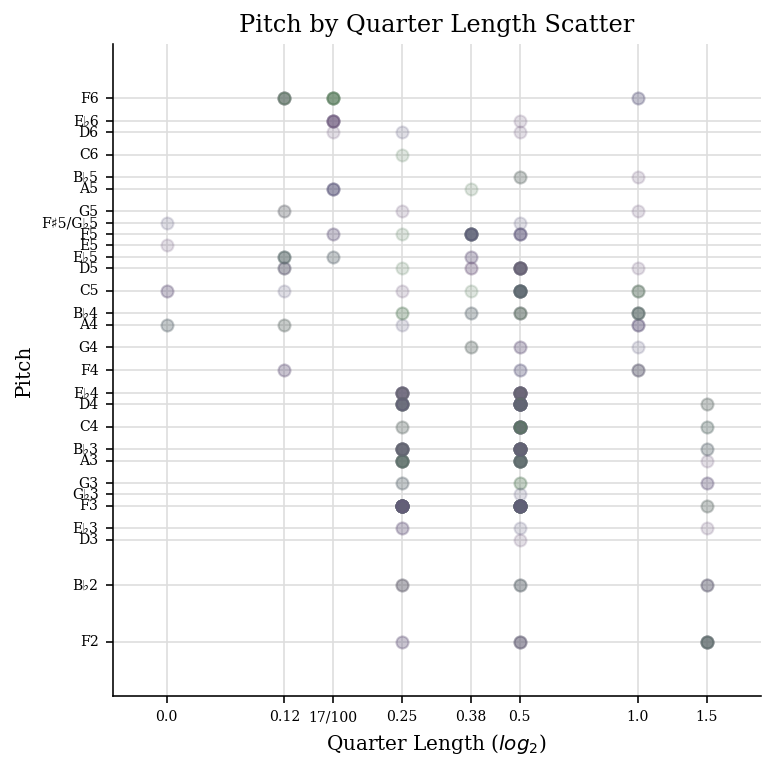

In [28]:
verdi.plot('scatter', 'dynamics')

Just getting started here... hang tight. :-)